# 180261A

# IMPORT REQUIRED LIBRARIES

In [26]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline

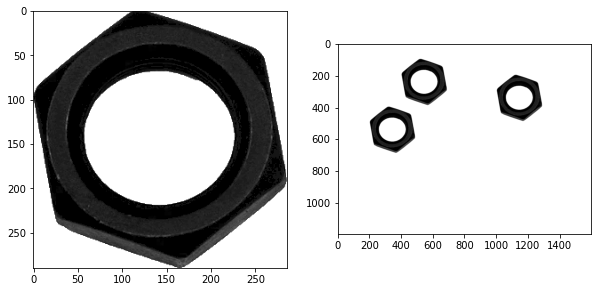

In [27]:
template_im = cv.imread(r'template.png', cv.IMREAD_GRAYSCALE)
belt_im =  cv.imread(r'belt.png', cv.IMREAD_GRAYSCALE)

fig, ax = plt. subplots(1,2,figsize=(10,10))
ax[0].imshow(template_im, cmap='gray')
ax[1].imshow(belt_im, cmap='gray')
plt.show()

# Otsu's thresholding

cv.threshold("image in gray scale", "Threshold Value", " maximum value which is assigned to pixel values exceeding the threshold", "Type of thresholding")
 
cv.THRESH_BINARY
cv.THRESH_BINARY_INV
cv.THRESH_TRUNC
cv.THRESH_TOZERO
cv.THRESH_TOZERO_INV these are the simple threshold types.In our case we use cv.THRESH_BINARY_INV and otsu threshold method.

In global thresholding, we used an arbitrary chosen value as a threshold. In contrast, Otsu's method avoids having to choose a value and determines it automatically

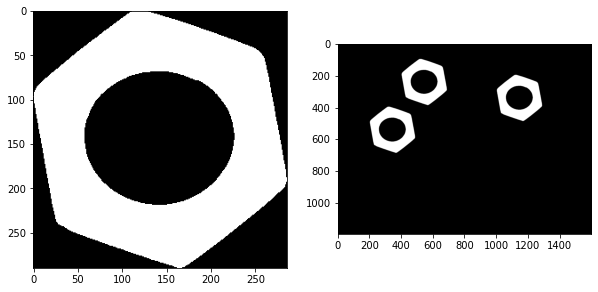

In [28]:
th_t, img_t = cv.threshold(template_im,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
th_b, img_b = cv.threshold(belt_im,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

fig, ax = plt. subplots(1,2,figsize=(10,10))
ax[0].imshow(img_t, cmap='gray')
ax[1].imshow(img_b, cmap='gray')
plt.show()

# Morphological closing

Morphological transformations are some simple operations based on the image shape. It is normally performed on binary images. It needs two inputs, one is our original image, second one is called structuring element or kernel which decides the nature of operation. Two basic morphological operators are Erosion and Dilation.
Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object.

1. Erosion
The basic idea of erosion is just like soil erosion only, it erodes away the boundaries of foreground object (Always try to keep foreground in white)
2. Dilation
It is just opposite of erosion.

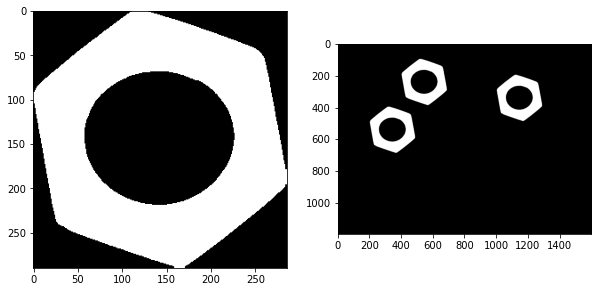

In [33]:
kernel =np.ones((3,3),dtype=np.uint8)        
closing_t = cv.morphologyEx(img_t, cv.MORPH_CLOSE, kernel)
closing_b = cv.morphologyEx(img_b, cv.MORPH_CLOSE, kernel)      

fig, ax = plt. subplots(1,2,figsize=(10,10))
ax[0].imshow(closing_t, cmap='gray')
ax[1].imshow(closing_b, cmap='gray')
plt.show()

# Connected component analysis

In [34]:
retval_t, labels_t, stats_t, centroids_t = cv.connectedComponentsWithStats(closing_t)
retval_b, labels_b, stats_b, centroids_b = cv.connectedComponentsWithStats(closing_b)     

print("Number of Components in Template : ",retval_t)
print("Number of Nuts in Template       : ",retval_t-1)

print("Number of Components in Belt : ",retval_b)
print("Number of Nuts in Belt       : ",retval_b-1)

print(" ")
print("Stats of Template :")
print(stats_t)
print(" ")
print("Stats of Belt :")
print(stats_b)
print(" ")

print("Centroids of Belt :")
print(centroids_b)
print(" ")
print("Centroids of Template :")
print(centroids_t)

Number of Components in Template :  2
Number of Nuts in Template       :  1
Number of Components in Belt :  4
Number of Nuts in Belt       :  3
 
Stats of Template :
[[    0     0   286   290 42290]
 [    0     0   286   290 40650]]
 
Stats of Belt :
[[      0       0    1600    1200 1798161]
 [    400     100     286     290   40613]
 [   1000     200     286     290   40613]
 [    200     400     286     290   40613]]
 
Centroids of Belt :
[[ 807.85728475  614.56805258]
 [ 542.82567158  243.78479797]
 [1142.82567158  343.78479797]
 [ 342.82567158  543.78479797]]
 
Centroids of Template :
[[142.18770395 145.19172381]
 [142.82489545 143.780369  ]]


## How many connected components are detected in each image?

In the above code retval_t and retval_b represents the total number of components in template and belt image respectively.
In this case,

ratval = Total number of nuts + background label

In the template image:
Total number of components detected = 2
Total number of nuts detected = 1

In the belt image:
Total number of components detected = 4
Total number of nuts detected = 3

## What are the statistics? Interpret these statistics.

Stats matrix represents the following statistics of all the components. In our case, the first row represents the background label, and other
rows represents stats of each nut in the image.

Representing stats are,
Column 1 :The leftmost (x) coordinate which is the inclusive start of the bounding box in the horizontal direction (cv2.CC_STAT_LEFT)
Column 2 :The topmost (y) coordinate which is the inclusive start of the bounding box in the vertical direction (cv2.CC_STAT_TOP)
Column 3 :The horizontal size of the bounding box (cv2.CC_STAT_WIDTH)
Column 4 :The vertical size of the bounding box (cv2.CC_STAT_HEIGHT )
Column 5 :The total area (in pixels) of the connected component (cv2.CC_STAT_AREA )

## Interpretation

In the background label, i.e. first row of stats matrices, both leftmost and topmost coordinate values are zero in both stats_t and stats_b.
In the template image, the leftmost and topmost coordinates are the same, because the nut is partially cut-off by the boundaries of the
background. Therefore, the width and hight of the bounding box remains same as the background, but the areas of the background and
the nuts are alomst the same.
In the belt image, the leftmost and topmost coordinates of 3 nuts changed according to the position. But we can observe that the area and
the size of the bounding box of 3 nuts are the same, implies that the appearance of 3 nuts are almost the same.

## What are the centroids?

centroids - matrix with the x and y locations of each centroid. The row in this matrix corresponds to the label number............(as you can see for the belt.png there are 4 centroids(first one for bacground and others for nuts on the belt))

# Contour analysis

Contours can be explained simply as a curve joining all the continuous points (along the boundary), having same color or intensity. The contours are a useful tool for shape analysis and object detection and recognition

cv.findContours("image", "Contour retrieval mode", "Contour Approximation Method")

Contour retrieval mode = mode of the contour retrieval algorithm {(RETR_TREE -retrieves all of the contours), (RETR_EXTERNAL - retrieves only the extreme outer contours)}

Contour Approximation Method = {( cv.CHAIN_APPROX_NONE - all the boundary points are stored. use more memory space), (cv.CHAIN_APPROX_SIMPLE - removes all redundant points and compresses the contour, thereby saving memory.)}

## outputs of the function

contours = Detected contours. Each contour is stored as a vector of points

hierarchy = Optional output vector, containing information about the image topology.

In [43]:
contours_t, hierarchy_t = cv.findContours(closing_t, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours_b, hierarchy_b = cv.findContours(closing_b, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)  

No. of contours =6


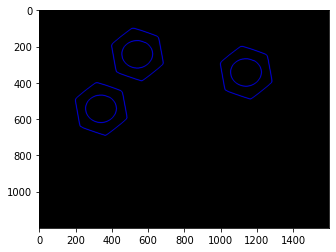

In [44]:
# Visualizing contours
im_contours_belt = np.zeros((belt_im.shape[0],belt_im.shape[1],3), np.uint8)
conts = cv.drawContours(im_contours_belt, contours_b, -1, (0,0,255), 3).astype('uint8')
plt.imshow(conts)

print("No. of contours ="+ str(len(contours_b)))

# Count the number of matching hexagonal nuts

0.00010071698397173812
0.00010071698397950968
0.00010071698397506879


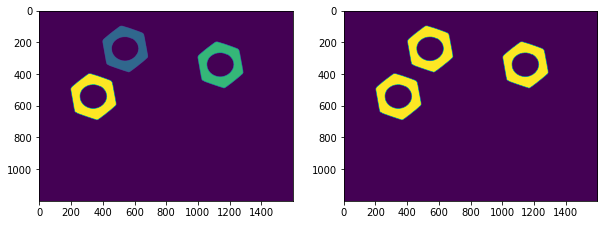

In [53]:
label = 1 # remember that the label of the background is 0
belt = ((labels_b >= label)*255).astype('uint8') 

belt_cont, template_hierarchy = cv.findContours(belt, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)  
for j,c in enumerate(belt_cont):
        print(cv.matchShapes(contours_t[0], c, cv.CONTOURS_MATCH_I1, 0.0))    #If match 100%,output will be 0

fig, ax = plt. subplots(1,2,figsize=(10,10))
ax[0].imshow(labels_b)
ax[1].imshow(belt)
plt.show()

# PART 2

## Frame tracking through image moments.

In [54]:
ca = cv.contourArea(contours_b[1])
M = cv.moments(contours_b[1])           # weighted average of the image pixel intensities
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

print("Contour Area :",ca)

print("Image Moment")
print(M)
print("")

print("x coordinate :",cx)
print("y coordinate :",cy)

Contour Area : 20080.0
Image Moment
{'m00': 20080.0, 'm10': 6857249.333333333, 'm01': 10902219.5, 'm20': 2377821838.6666665, 'm11': 3722971235.5, 'm02': 5947774212.166666, 'm30': 836677775088.6001, 'm21': 1290927450455.1833, 'm12': 2031031745454.1167, 'm03': 3260276110202.5503, 'mu20': 36095323.75130558, 'mu11': -98356.04525279999, 'mu02': 28531680.98238945, 'mu30': 7133283.688598633, 'mu21': -18102990.339790344, 'mu12': -5413550.269262314, 'mu03': 14292721.049316406, 'nu20': 0.08952071135603398, 'nu11': -0.00024393473231774097, 'nu02': 0.07076197446863307, 'nu30': 0.00012484760770737689, 'nu21': -0.00031684076155347586, 'nu12': -9.474862206886426e-05, 'nu03': 0.0002501529601981355}

x coordinate : 341
y coordinate : 542


In [55]:
count = 1
object_prev_frame = np.array([cx, cy, ca, count])

delta_x = 15
object_curr_frame = np.array([cx, cy, ca, count])

movement_of_cx = object_curr_frame[0] - object_prev_frame[0]

if movement_of_cx < delta_x :
    print("Movement in x Direction :",movement_of_cx)

Movement in x Direction : 0.0


# PART 3

## 1. Implement the function get_indexed_image

In [56]:
def get_indexed_image(im):
    th_im, img_im = cv.threshold(im, 0, 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)       # Ostu's+inverse binary thresholding
    kernel = np.ones((3,3), dtype=np.uint8)                                             #3x3 matrix with all ones, with uint8 dtype
    closing_im = cv.morphologyEx(img_im, cv.MORPH_CLOSE, kernel)                        # Morphology transforamtion  
    retval, labels, stats, centroids = cv.connectedComponentsWithStats(closing_im)      # connected component analysis


    return retval, labels, stats, centroids

## 2. Implement the function is_new

In [64]:
def is_new(a, b, delta, i):   # define a function to check the dissimilarity between 2 vectors
    val = True
    for count_a in range(a.shape[0]):       #runs the loop equal times to no of rows in a
        if np.abs((a[count_a, i[0]]) - b[i[0]]) < delta[0]:    #compare i th colomn element both in a and b w.r.t delta value
            val=False
    return val

In [65]:
# check is_new  expected answer False

a = np.array([[1.36100e+03, 5.53000e+02, 5.99245e+04, 2.00000e+00],
 [7.61000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00],
 [1.55200e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00]])
b = np.array([7.51000e+02, 4.53000e+02, 5.99385e+04, 3.00000e+00])
delta = np.array([delta_x])
i = np.array([0])

assert is_new(a, b, delta, i) == False, " Check the function "


In [71]:
def prev_index(a, b, delta, i):
    index = -1
    for count_a in range(a.shape[0]):
        is_similar = is_new(a[count_a].reshape((1,4)), b, delta, i)    # taking similarity variable. Remember to reshape
        if not is_similar:      # if is_similar is false, means two vectors are similar
            index = count_a     # previous contour index = count_a

    return index

In [72]:
# check prev_index expected answer 1
a = np.array([[1.36100e+03, 5.53000e+02, 5.99245e+04, 2.00000e+00],
[7.61000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00],
[1.55200e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00]])
b = np.array([1.36100e+03, 5.53000e+02, 5.99245e+04, 2.00000e+00])
delta = np.array([delta_x])
i = np.array([0])

prev_index(a,b,delta,i)
#assert prev_index(a,b,delta,i) == 1, " Check the function "

0

In [73]:
def get_contours(img):
    retval, labels, stats, centroids = get_indexed_image(img)                                        # labeling the image
    label = 1                                                                                        # remember that the label of the background is 0
    belt = ((labels >= label)*255).astype('uint8')
    im_belt_cont, template_hierarchy = cv.findContours(belt, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)  # find the outermost contour of the image
    
    return im_belt_cont

In [74]:
cap = cv.VideoCapture('conveyor_with_rotation.mp4')     # give the correct path here
while cap.isOpened():
    ret, frame = cap.read()        # taking the current frame of the image
# if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    grey = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)                    # convert fram into grayscale
    cv.imshow("frame", grey)                                        # displaying grayscale image
    if cv.waitKey(1) == ord('s'):
        break

    cv.namedWindow("IMAGE", cv.WINDOW_AUTOSIZE)                     # create a window for displaying images.

    contours = get_contours(grey)                                   # taking draw contour matrix
    im_contours_belt = np.zeros((grey.shape[0],grey.shape[1],3), np.uint8)
    draw_cont = cv.drawContours(im_contours_belt, contours, -1, (200,200,50), 3).astype('uint8')    
    cv.imshow("IMAGE", draw_cont)
    #plt.imshow(conts)

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting ...


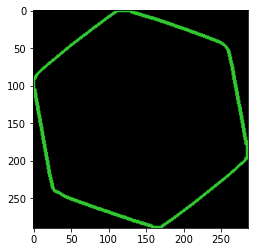

In [75]:
# Visualizing contour of template nut

contours_t = get_contours(template_im)                                   # taking draw contour matrix
im_contours_temp = np.zeros((template_im.shape[0],template_im.shape[1],3), np.uint8)        # Create black background
draw_cont = cv.drawContours(im_contours_temp, contours_t, -1, (50,200,50), 3).astype('uint8')   
plt.imshow(draw_cont)

In [78]:
i = np.array([0])           
delta = np.array([15])  
frame_num=0                    
anchor=(100,1050)               

cap = cv.VideoCapture('conveyor_with_rotation.mp4')     # loading the video

cap_create = cv.VideoWriter('180261A_en2550_a05.mp4', -1 , 30.0, (1920,1080))     # writing video file

a=np.array([])   #define empty array for a vector

while cap.isOpened():
    ret, frame = cap.read()                         # taking each frame
    frame_num+=1                                    #update frame number        
    indent=0               
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    grey = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)                                # convert frame to grayscale
    contours_belt = get_contours(grey)                                          # taking contours of grey image
    im_contours_belt = np.zeros((grey.shape[0],grey.shape[1],3), np.uint8)      # create background     

    for cont in contours_belt:
        text = ""
        if cv.matchShapes(contours_t[0], cont, cv.CONTOURS_MATCH_I1, 0.0) > 0.0008: # if 2 shapes maches, check the next contour in the belt
            continue
        
        # calculating image moments 
        ca = cv.contourArea(cont)
        M = cv.moments(cont)
        if M['m00']==0:
            continue
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        count = 1 #number of contours
        object_curr_frame = np.array([cx, cy, ca, count])

        
        if a.shape[0]==0:                                       # run until the first nut detected 
            a=(np.append(a,object_curr_frame)).reshape((1,4))   # update a vector with first nut value
            index=a.shape[0]-1                                  

        elif is_new(a, object_curr_frame, delta, i):                    # if a new object detected in the current frame                   
            a=np.concatenate((a,np.array([object_curr_frame])),axis=0)  # add the new nut value to the a vector 
            index=a.shape[0]-1                                          # update the index                                 
        else:
            index=prev_index(a, object_curr_frame, delta, i)            # if a new nut is not detected, remain index as the same  
            a[index]=object_curr_frame                                # update a vector last index value with current frame object value 

        font = cv.FONT_HERSHEY_COMPLEX
        cv.putText(im_contours_belt, str(index+1), (cx,cy), font, 2, (255,255,255), 2, cv.LINE_AA)                    # nut index

        text += "Object " + str(index+1) + " " + str(a[index,0]) + ", " + str(a[index,1]) + ", " + str(a[index,2])  # current framw text
        cv.putText(im_contours_belt, text, (anchor[0],anchor[1]-indent), font , 1, (255,0,255), 1, cv.LINE_AA)    # put nut index
        indent+=50
        
    
    cv.putText(im_contours_belt,"Frame "+str(frame_num), (anchor[0],anchor[1]-indent), font, 1,(0,255,0),1,cv.LINE_AA)  # add frame number
    cv.putText(im_contours_belt,"Index Number : "+"180261A",(anchor[0],50), font, 1, (255,255,255),1,cv.LINE_AA)           # add index number 
    draw_conts = cv.drawContours(im_contours_belt, contours_belt, -1, (50,200,50), 3).astype('uint8')                        # showing window                    
    cv.namedWindow("frame", cv.WINDOW_NORMAL)    
    cv.imshow("frame",draw_conts)     

    cap_create.write(draw_conts)                                                                                              
    if cv.waitKey(1) == ord('s'):
        break

cap.release()
cap_create.release()    # saving the video
cv.destroyAllWindows()

    


Can't receive frame (stream end?). Exiting ...
